In [25]:
import pandas as pd

In [26]:
dataset = pd.read_csv('spotify_dataset.csv')

dataset.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [28]:
artist_dict = {}

for idx in dataset.index:
    
    artists = dataset['Artist'][idx]
    
    artists.replace('Tyler, The Creator', 'Tyler The Creator')
    
    artist = artists.split(', ')
    
    for e in artist:
        
        colabs = artist
        
        for art in colabs:
            if art == e:
                colabs.remove(art)
        
        generos = dataset['Genre'][idx].replace('[', '')
        generos = generos.replace(']', '')
        generos = generos.replace(', ', ',')
        generos = generos.replace("'", '')
        generos = generos.split(',')
        
        for g in generos:
                if g == '':
                    generos.remove(g)
        
        
        if e not in artist_dict:
            artist_dict[e] = {'num_musics': 1,
                              'streams': int(dataset['Streams'][idx].replace(',', '')),
                              'generos': generos,
                              'colabs': colabs}
        else:
            artist_dict[e]['num_musics'] += 1
            artist_dict[e]['streams'] += int(dataset['Streams'][idx].replace(',', ''))
            
            for g in generos:
                if g not in artist_dict[e]['generos']:
                    artist_dict[e]['generos'].append(g)
            
            for c in colabs:
                if c not in artist_dict[e]['colabs']:
                    artist_dict[e]['colabs'].append(c)
artist_dict

{'Måneskin': {'num_musics': 4,
  'streams': 86402001,
  'generos': ['indie rock italiano', 'italian pop'],
  'colabs': []},
 'The Kid LAROI': {'num_musics': 9,
  'streams': 99132817,
  'generos': ['australian hip hop', ' '],
  'colabs': []},
 'Olivia Rodrigo': {'num_musics': 12,
  'streams': 163685977,
  'generos': ['pop'],
  'colabs': []},
 'Ed Sheeran': {'num_musics': 9,
  'streams': 80580568,
  'generos': ['pop', 'uk pop'],
  'colabs': []},
 'Lil Nas X': {'num_musics': 7,
  'streams': 88772841,
  'generos': ['lgbtq+ hip hop', 'pop rap'],
  'colabs': ['Billy Ray Cyrus']},
 'Doja Cat': {'num_musics': 17,
  'streams': 145125833,
  'generos': ['dance pop', 'pop'],
  'colabs': ['The Weeknd']},
 'Rauw Alejandro': {'num_musics': 16,
  'streams': 102871195,
  'generos': ['puerto rican pop',
   'trap latino',
   'latin',
   'reggaeton',
   'reggaeton colombiano',
   'latin pop',
   'reggaeton flow'],
  'colabs': ['Mr. Naisgai',
   'Beéle',
   'Mambo Kingz',
   'DJ Luian',
   'Darell',
   'An

In [29]:
from graph_tool import Graph

g = Graph(directed=False) # não-dirigido pois numa colab não importa a ordem

g.vp['Nome_Artista'] = g.new_vp('object')
g.vp['Streams'] = g.new_vp('object')
g.vp['Colabs'] = g.new_vp('object')
g.vp['Generos'] = g.new_vp('object')

In [30]:
for artist in range(len(artist_dict)):
    g.add_vertex()
    
    nome = list(artist_dict.keys())[artist]
    
    g.vp['Nome_Artista'][artist] = nome
    g.vp['Streams'][artist] = artist_dict[nome]['streams']
    g.vp['Colabs'][artist] = artist_dict[nome]['colabs']
    g.vp['Generos'][artist] = artist_dict[nome]['generos']

In [31]:
import numpy as np

artistas = list(artist_dict.keys())

for artista in artistas:
    index_artista_1 = artistas.index(artista)
    
    for artista_2 in artist_dict[artista]['colabs']:
        try:
            index_artista_2 = artistas.index(artista_2)
            
            e = g.edge(index_artista_1, index_artista_2, add_missing=False)
            
            if e == None and artista != artista_2:
                g.add_edge(index_artista_1, index_artista_2)
                
        except:
            pass

In [32]:
df = pd.DataFrame({k: list(v) for k, v in g.vp.items()})

list(df[df["Nome_Artista"] == "Bad Bunny"]['Colabs'])

[['J Balvin',
  'Jhay Cortez',
  'ROSALÍA',
  'Dua Lipa',
  'Jowell & Randy',
  'Ñengo Flow',
  'ABRA',
  'Sech',
  'Don Omar',
  'Daddy Yankee',
  'Nicky Jam',
  'Tainy',
  'Zion & Lennox',
  'Gabriela',
  'Yaviah',
  'Anuel AA',
  'Duki',
  'Pablo Chill-E',
  'Mora',
  'Kendo Kaponi',
  'Arcangel',
  'Myke Towers']]

In [33]:
import netpixi

from netpixi.data.gt import *

In [34]:
save_gt(g, 'spotfy.net.gz')
r = netpixi.render('spotfy.net.gz', infinite=True)

In [35]:
r.vertex_set_key('Nome_Artista')

In [36]:
grafo = load_gt('spotfy.net.gz')
m = draw_gt.sfdp_layout(grafo)
move_gt(grafo, m)
save_gt(grafo, 'exemplo.net.gz')
r = netpixi.render('exemplo.net.gz', infinite=True);

In [43]:
r.vertex_set_key('Nome_Artista')

## Cálculo das Centralidades

In [39]:
from graph_tool import centrality
from graph_tool import clustering


bc, _ = centrality.betweenness(grafo)

hcc = centrality.closeness(grafo, harmonic=True)

_, ec = centrality.eigenvector(grafo)

c = clustering.local_clustering(grafo)

dc = degree_gt(grafo)

In [40]:
grafo.vp['degree'] = dc

grafo.vp['betweenness'] = bc

grafo.vp['closeness'] = hcc

grafo.vp['eigenvector'] = ec

grafo.vp['clustering'] = c

In [103]:
df = pd.DataFrame({k: list(v) for k, v in grafo.vp.items()})
# df[df["degree"] > 0.03]
df.head()

,id,Nome_Artista,Streams,Colabs,Generos,_x,_y,degree,betweenness,closeness,eigenvector,clustering
0,0,Måneskin,86402001,[],"[indie rock italiano, italian pop]",168.962127,22.717146,0.000000,0.0,0.000000,0.000000,0.0
1,1,The Kid LAROI,99132817,[],"[australian hip hop, ]",39.806944,67.360349,0.001779,0.0,0.060606,0.001929,0.0
2,2,Olivia Rodrigo,163685977,[],[pop],230.049581,57.516896,0.000000,0.0,0.000000,0.000000,0.0
3,3,Ed Sheeran,80580568,[],"[pop, uk pop]",-84.406752,-31.516749,0.000000,0.0,0.000000,0.000000,0.0
4,4,Lil Nas X,88772841,[Billy Ray Cyrus],"[lgbtq+ hip hop, pop rap]",-114.496200,5.991537,0.000000,0.0,0.000000,0.000000,0.0


In [104]:
df.describe()

,id,Streams,_x,_y,degree,betweenness,closeness,eigenvector,clustering
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02,563.000000
mean,281.000000,1.878026e+07,15.223349,22.012069,0.002434,0.000341,0.017038,1.099220e-02,0.086672
std,162.668374,3.644783e+07,104.843665,104.837823,0.005916,0.001491,0.030549,4.072243e-02,0.240495
min,0.000000,4.218201e+06,-203.807803,-196.717249,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,140.500000,5.112572e+06,-64.991008,-58.396485,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,281.000000,6.985392e+06,14.776125,24.347816,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,421.500000,1.518191e+07,93.294625,96.940770,0.001779,0.000000,0.008897,1.260064e-09,0.000000
max,562.000000,3.814805e+08,233.958810,239.924616,0.055160,0.012375,0.119187,3.299313e-01,1.000000


In [116]:
# df= df[df['betweenness'] != 0]

## Teste da Hipótese 2

H2: ***Colab tem relação com	Sucesso_Artista*** (A participação de um artista em colabs aumenta seu sucesso)

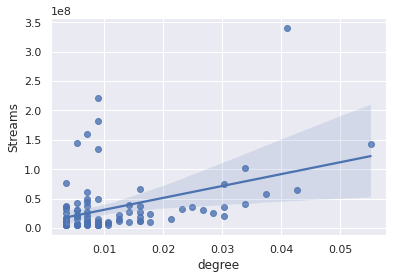

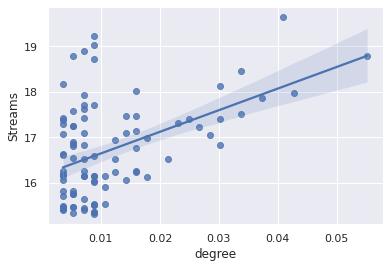

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

sns.regplot(x=df['degree'], y=df['Streams'])
plt.show()

sns.regplot(x=df['degree'], y=np.log(df['Streams']))
plt.show()

In [114]:
import statsmodels.formula.api as smf

model = smf.ols(data=df, formula='np.log(Streams) ~ degree + betweenness') # Streams é explicada por degree?
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Streams)   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     44.69
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.02e-14
Time:                        00:31:52   Log-Likelihood:                -105.21
No. Observations:                  94   AIC:                             216.4
Df Residuals:                      91   BIC:                             224.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.1554      0.117    137.952      0.000      15.923      16.388
degree         10.9732      9.187      1.194      0.235      -7.276      29.222
betweenness   212.7101     29.949      7.102      0.000     153.220     272.201
==============================================================================
Omnibus:                        2.898   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.798
Skew:                           0.362   Prob(JB):                        0.247
Kurtosis:                       2.565   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

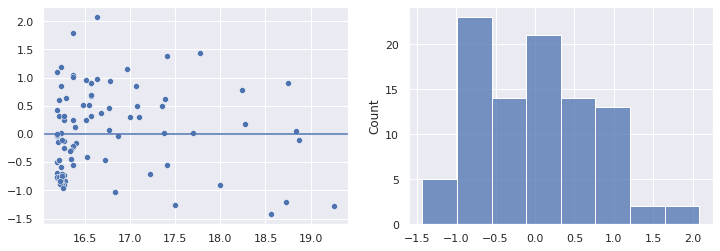

In [115]:
from matplotlib import rcParams

def linear_resplot(result):
    width, height = rcParams['figure.figsize']
    fig, axs = plt.subplots(1, 2, figsize=(2 * width, height))
    ax = sns.scatterplot(x=result.fittedvalues, y=result.resid, ax=axs[0])
    ax.axhline(0)
    sns.histplot(result.resid, ax=axs[1])
    plt.show()

linear_resplot(result)